**Import Basic Libraries**

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

**Load the raw dataset**

In [237]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Review of the dataset**

In [238]:
print("Rows and Columns: ",df.shape)
df.info()

Rows and Columns:  (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBil

**Check the null values**

In [239]:
df.isnull().sum().sort_values(ascending=False)

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Check dublicates and customer ID**

In [240]:
print("Duplicates values" , df.duplicated().sum())
print("unique custumer ID" , df['customerID'].nunique())

Duplicates values 0
unique custumer ID 7043


**Fix Totalcharges**

In [241]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors = "coerce")
df['TotalCharges'].isnull().sum()

np.int64(11)

**replace null values with 0**

In [242]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'].isnull().sum()

np.int64(0)

**Convert Churn into numbers**

In [243]:
df['Churn'] = df['Churn'].map({'Yes' : 1 , 'No' : 0})
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


**Drop the Customer ID column**

In [244]:
df = df.drop(columns = ['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


**Find the rate of Churn**

In [245]:
Churn_rate = df['Churn'].mean() *100
print("Churn percentage: ",Churn_rate)

Churn percentage:  26.536987079369588


In [246]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


**Visulization**

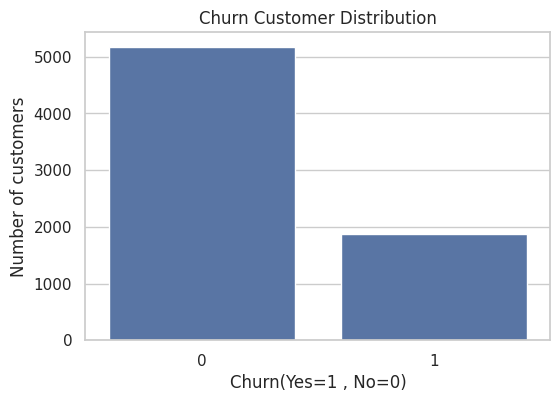

In [247]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn' , data = df)
plt.title('Churn Customer Distribution')
plt.xlabel("Churn(Yes=1 , No=0)")
plt.ylabel("Number of customers")
plt.show()

*The majority of customers did not churn; however, a significant portion of customers left the service, indicating a notable churn problem that requires further investigation.*

In [248]:
df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


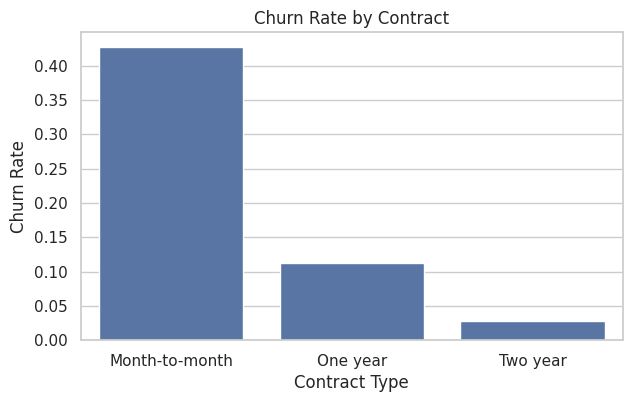

In [249]:
plt.figure(figsize=(7,4))
sns.barplot(
    x=df.groupby('Contract')['Churn'].mean().index,
    y=df.groupby('Contract')['Churn'].mean().values,
)
plt.title('Churn Rate by Contract')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()

*Customers with month-to-month contracts show the highest churn rate, while long-term contracts significantly reduce customer attrition.*

**Create Tenure Groups**

In [250]:
df['TenureGroup']= pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 36, 48, 60, 72],
    labels= ["0-1 yr" , "1-2 yr", "2-3 yr", "3-4 yr", "4-5 yr", "5-6 yr"]
)

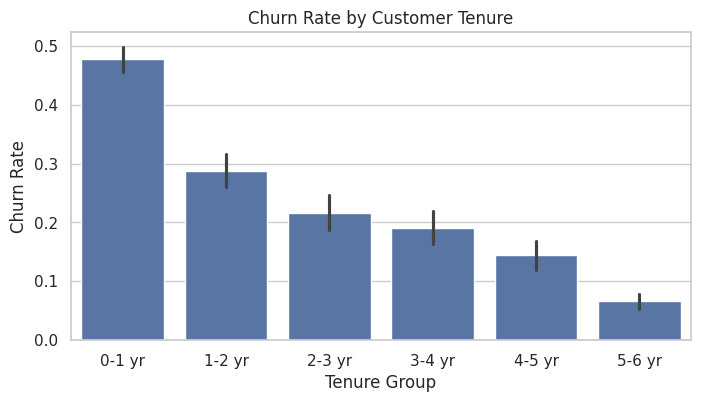

In [251]:
plt.figure(figsize=(8,4))
sns.barplot( x='TenureGroup' , y = 'Churn', data=df)
plt.title("Churn Rate by Customer Tenure")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate")
plt.show()

*Customer churn is highest during the initial tenure period, suggesting that early customer experience and onboarding play a critical role in retention.*


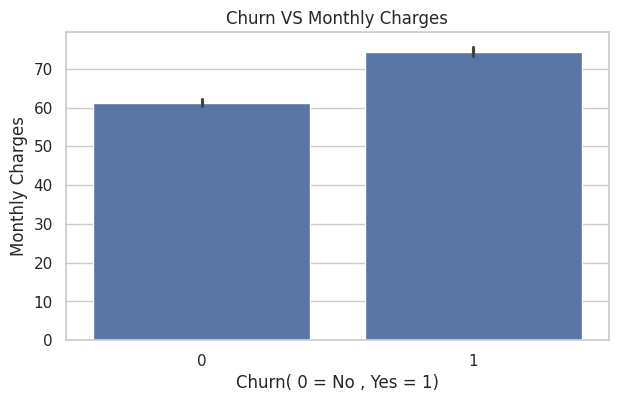

In [252]:
plt.figure(figsize=(7,4))
sns.barplot(x='Churn', y='MonthlyCharges', data = df)
plt.title("Churn VS Monthly Charges")
plt.xlabel("Churn( 0 = No , Yes = 1)")
plt.ylabel("Monthly Charges")
plt.show()


*Customers who churn tend to have higher monthly charges, indicating that pricing may be a contributing factor to customer attrition.*

**Revenue Impact Analysis**

In [253]:
df['MonthlyRevenue'] = df['MonthlyCharges']
df[['MonthlyCharges','MonthlyRevenue']].head()

,MonthlyCharges,MonthlyRevenue
0,29.85,29.85
1,56.95,56.95
2,53.85,53.85
3,42.30,42.30
4,70.70,70.70


In [254]:
Total_monthly_revenue = df['MonthlyRevenue'].sum()
print("Total Monthly Revenue: ",Total_monthly_revenue)

Total Monthly Revenue:  456116.6


In [255]:
churned_revenue = df[df['Churn']==1]['MonthlyRevenue'].sum()
print("Churned Revenue: ",churned_revenue)

Churned Revenue:  139130.85


In [256]:
percentage_churned_revenue = (churned_revenue/Total_monthly_revenue)*100
print("Percentage of Churned Revenue: ",percentage_churned_revenue)

Percentage of Churned Revenue:  30.503351555282137


In [257]:
revenue_by_contract = df[df['Churn']==1].groupby('Contract')['MonthlyRevenue'].sum().sort_values(ascending=False)
print(revenue_by_contract)

Contract
Month-to-month    120847.10
One year           14118.45
Two year            4165.30
Name: MonthlyRevenue, dtype: float64


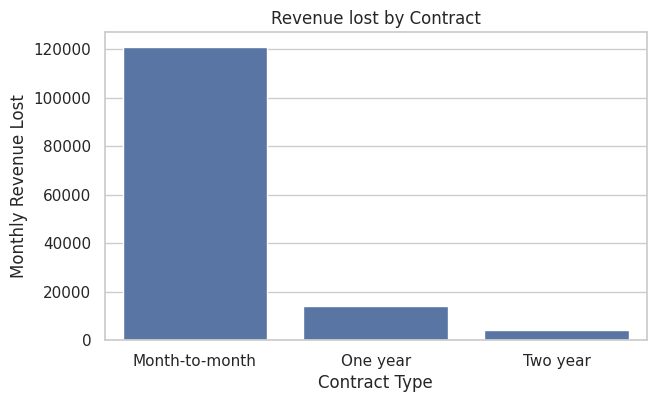

In [258]:
plt.figure(figsize=(7,4))
sns.barplot(x = revenue_by_contract.index,
            y = revenue_by_contract.values)
plt.title("Revenue lost by Contract")
plt.xlabel("Contract Type")
plt.ylabel("Monthly Revenue Lost")
plt.show()

In [259]:
high_value_churn = df[(df['Churn']==1) & (df['MonthlyCharges'] > df['MonthlyCharges'].median())]
high_value_churn


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MonthlyRevenue
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 yr,70.70
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,0-1 yr,99.65
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,2-3 yr,104.80
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,4-5 yr,103.70
26,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,1,3-4 yr,99.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,1,0-1 yr,74.45
7018,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,1,0-1 yr,70.65
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1,0-1 yr,75.75
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1,5-6 yr,102.95


* *A significant portion of monthly revenue is lost due to customer churn*.
- *Month-to-month contract customers contribute the highest revenue loss*.
- *High-value customers with above-average monthly charges represent a critical churn risk group.*

**Business Recommendations**
- Encourage customers to move from month-to-month contracts to long-term contracts through discounts or loyalty programs.
- Focus on improving onboarding experience for new customers, as churn is highest in early tenure periods.
- Monitor high-value customers with above-average monthly charges and offer personalized retention strategies.
- Review pricing strategies to reduce churn among customers with higher monthly charges.

## Conclusion
This project analyzed customer churn behavior using exploratory data analysis techniques. Key churn drivers such as contract type, tenure, and monthly charges were identified, and the revenue impact of churn was quantified. The insights and recommendations from this analysis can help businesses improve customer retention and reduce revenue loss.
